## 기본옵션

In [1]:
import sys, os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import pickle
import cv2

In [2]:
# 시스템 인코딩 확인용
sys.stdout.encoding

'UTF-8'

### 상용 한글 2350개의 음절과 유니코드

In [3]:
# 한국어 음절 유니코드는 AC00~D7A3
co = "0 1 2 3 4 5 6 7 8 9 A B C D E F"
start = "AC00"
end = "D7A3"

co = co.split(" ")
syllables = [a+b+c+d
            for a in co
            for b in co
            for c in co
            for d in co]

# syllables : 가능한 유니코드 전체 조합
syllables = np.array(syllables)

# 한글 음절 조합 생성 - hangul_syllables 11172개
ga = np.where(start == syllables)[0][0]
higt = np.where(end == syllables)[0][0]

hangul_uni = syllables[ga : higt+1]

print(hangul_uni)
print(len(hangul_uni))

['AC00' 'AC01' 'AC02' ... 'D7A1' 'D7A2' 'D7A3']
11172


In [4]:
# 16진수 유니코드 -> 한글 변환 (확인용, '가'만 프린트)
chars = chr(int(hangul_uni[0],16))
print(chars)

가


In [5]:
# 상용한글 2350 음절 
file = open('hangul.txt', 'r', encoding='utf-8')
using_hangul =list(file.read())
using_hangul[0].encode('utf-8')

# 상용 한글 2350개
len(using_hangul)

# 전체 한글 완성자 11172개의 유니코드
hangul_uni = hangul_uni.tolist()

# 전체 한글 완성자 11172개 한글
hangul = list(map(lambda x : chr(int(x, 16)), hangul_uni))


index = np.arange(len(hangul))
using_index = []
for i in range(len(using_hangul)):
    for j in range(len(hangul)):
        if using_hangul[i] in hangul[j]:
            using_index.append(j)
            
# 상용 2350개의 유니코드
using_uni = []
for i in range(len(using_index)):
    using_uni.append(hangul_uni[using_index[i]])

len(using_uni)

2350

## TTF-to-PNG
### Font List
- 바탕 : batang
- 돋움 : dotum
- 고딕 : gothic
- 명조 : myeongjo

In [6]:
def ttftopng(list):
    font_path = "fonts/"+list+"/"
    font_list=os.listdir("fonts/"+list+"/")
    
    # 폰트별 이미지 저장 
    num = np.arange(1,len(using_uni)+1,1).astype("str")

    for uni in range(len(num)):
        chars = chr(int(using_uni[uni], 16))
        path = "./png/"+list+"/"
        os.makedirs(path, exist_ok = True)
        for ttf in font_list:
            font = ImageFont.truetype(font = font_path + ttf, size = 56)
            x, y = font.getsize(chars)
        
            theImage = Image.new('RGB', (x + 4, y + 4), color='white')
            theDrawPad = ImageDraw.Draw(theImage)
            theDrawPad.text((0.0, 0.0), chars[0], font=font, fill='black')
        
            png_name = path + "/" + ttf[:-4] + "_" + num[uni]
            theImage.save('{}.png'.format(png_name))

In [7]:
def pngtopkl(list):
    images=[cv2.imread(file) for file in glob.glob("png/"+list+"/*.png")]
    with open("pickle"+"/"+list+".pkl",'wb') as a:
        pickle.dump(images, a)

In [8]:
list = ['batang', 'dotum','gothic','myeongjo']
for i in range(len(list)):
    ttftopng(list[i])
    pngtopkl(list[i])

### ttf to noise png

#### batang

In [2]:
def noise_img(list):
    images=[cv2.imread(file) for file in glob.glob("png/"+list+"/*.png")]

    # 이미지 전처리 : (16,16) -> 정규화 -> (64,64)
    img_16 =[]
    for i in range(len(images)):
        img_16.append(cv2.resize(images[i],(16,16)))
    img_16 = np.array(img_16)
    img_16 = img_16.astype('float32') / 255.0

    img_64 =[]
    for i in range(len(img_16)):
        img_64.append(cv2.resize(img_16[i], (64,64)))

    noise_img = []
    for i in range(len(img_64)):
        noise_img.append(cv2.blur(img_64[i], (5,5)))
    
    with open("pickle/"+list+"_noise.pkl",'wb') as a:
        pickle.dump(noise_img, a)

In [10]:
list = ['batang', 'dotum']
for i in range(len(list)):
    noise_img(list[i])
#     pngto_noisepkl(list[i])

In [11]:
list = ['gothic','myeongjo']
for i in range(len(list)):
    noise_img(list[i])

In [ ]:
######################################### 밑엔 버려

In [4]:
images=[cv2.imread(file) for file in glob.glob("png/batang/*.png")]

In [22]:
img_16 =[]
for i in range(len(images)):
    img_16.append(cv2.resize(images[i],(16,16)))
img_16 = np.array(img_16)
img_16 = img_16.astype('float32') / 255.0

img_64 =[]
for i in range(len(img_16)):
    img_64.append(cv2.resize(img_16[i], (64,64)))

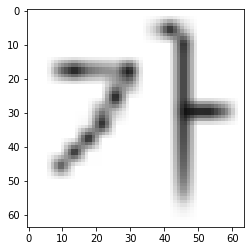

In [6]:
plt.imshow(img_64[0])

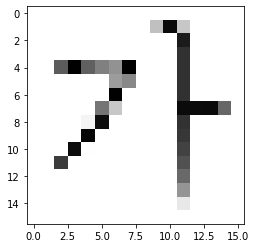

In [7]:
plt.imshow(img_16[0])

In [19]:
img_r = np.array(images[0])
img_r = img_r.astype('float32') / 255.0

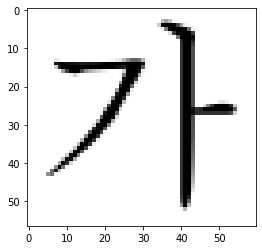

In [12]:
plt.imshow(img_r)

In [23]:
noise_img = []
for i in range(len(img_64)):
    noise_img.append(cv2.blur(img_64[i], (5,5)))

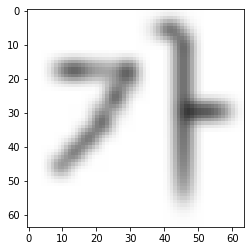

In [24]:
plt.imshow(noise_img[0])

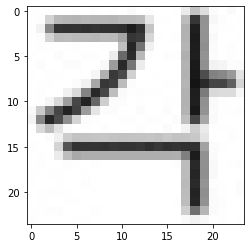

In [26]:
a=cv2.imread('aaa.jpg')
plt.imshow(a)

In [27]:
a.shape

(24, 24, 3)

In [28]:
aa = cv2.resize(a,(64,64))

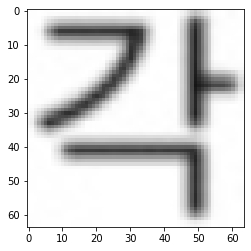

In [29]:
plt.imshow(aa)